In [1]:
import matplotlib.pyplot as plt
import Master
import numpy as np
import os
from tifffile import TiffFile
plt.rcParams.update({'font.size': 16})

In [115]:
## initialize master from topfile
topfile='/home/christoph/gits/CH-reconstruction/tests3/noisy_projections_new.top'
name=os.path.basename(topfile)
path=os.path.dirname(topfile)+'/'
try:
    image_stack=TiffFile(topfile[:-4]+'.tif').asarray()
except:
    image_stack=TiffFile(topfile[:-8]+'.tif').asarray()

print('initialize topology...')
master=Master.Master(topfile,path+'beamparameters.txt',image_stack)

initialize topology...


In [114]:
## calculate bondlength
scale=master.views[0].fov*10/master.views[0].imageWidth
bondlist=[]
for at in master.atoms:
    for neighb in at.neighbors:
            bondlength=np.sqrt((at.x-neighb.x)**2+(at.y-neighb.y)**2)
            bondlist.append(bondlength*scale)
bondlist=np.array(bondlist)    



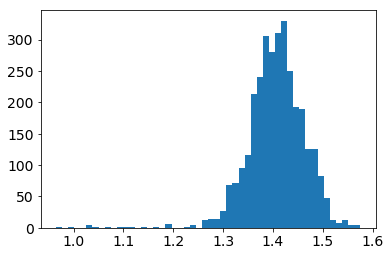

In [106]:
## plot distribution
n=50
plt.hist(bondlist,n)
plt.show()

standard deviation:	0.049255574357779414


/home/christoph/Programs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


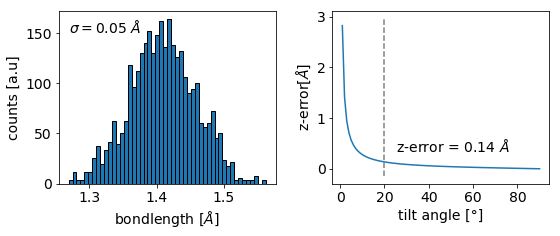

In [116]:
## plot with limits
mean_=1.415
tol=0.15
angle=20


redbonds=bondlist[(bondlist<mean_+tol)*(bondlist>mean_-tol)]

f,ax=plt.subplots(1,2,figsize=(8,3.5))
plt.rcParams.update({'font.size': 14})

ax[0].set_xlabel('bondlength [$\AA$]')
ax[0].set_ylabel('counts [a.u]')
ax[0].hist(redbonds,n,edgecolor='black')
#plt.savefig('bonddistribution.svg')

#plt.show()
std=np.std(redbonds)
print('standard deviation:\t'+str(std))
ax[0].text(1.27,150,'$\sigma=$'+str(round(std,2))+' $\AA$')


scale=180/np.pi
x=np.linspace(0,90,91)
y=std/np.tan(x/scale)
ax[1].plot(x,y)
ylims=plt.gca().get_ylim()
ax[1].vlines(angle,ylims[0],ylims[1],color='gray',linestyles='--')
ax[1].set_xlabel('tilt angle [°]')
ax[1].set_ylabel('z-error[$\AA$]')
ax[1].text(angle+5,y[angle]+0.2,'z-error = '+str(round(y[angle],2))+' $\AA$')
plt.tight_layout()
plt.savefig(path+'zerror.pdf')
plt.show()

/home/christoph/Programs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


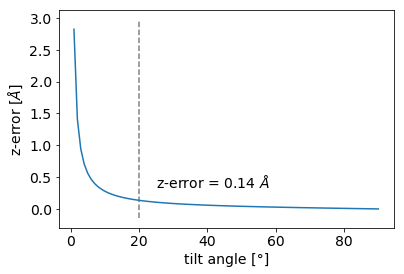

In [66]:
plt.text?